In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Ipl_Dataset.csv",index_col = "POS")

In [3]:
df.shape

(133, 13)

In [4]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 1 to 133
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  133 non-null    object 
 1   Mat     133 non-null    int64  
 2   Inns    133 non-null    int64  
 3   NO      133 non-null    int64  
 4   Runs    133 non-null    int64  
 5   HS      133 non-null    object 
 6   Avg     133 non-null    float64
 7   BF      133 non-null    int64  
 8   SR      133 non-null    float64
 9   100     133 non-null    int64  
 10  50      133 non-null    int64  
 11  4s      133 non-null    int64  
 12  6s      133 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 14.5+ KB


In [6]:
df[['Avg','SR']] = df[['Avg','SR']].astype(int)

In [7]:
df.describe()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,9.631579,6.631579,1.616541,139.157895,19.105263,105.714286,106.932331,0.037594,0.827068,11.894737,5.518797
std,4.893523,5.030925,1.550766,167.293103,17.949957,122.253870,44.453959,0.227170,1.351269,15.521375,7.393283
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,10.000000,6.000000,12.000000,88.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,5.000000,1.000000,59.000000,15.000000,53.000000,116.000000,0.000000,0.000000,5.000000,2.000000
75%,14.000000,11.000000,2.000000,232.000000,29.000000,169.000000,137.000000,0.000000,1.000000,20.000000,9.000000
max,17.000000,17.000000,7.000000,670.000000,101.000000,518.000000,191.000000,2.000000,5.000000,67.000000,30.000000


# EDA:-

# Q1. What is the top 5 maximum number of matches played by an individual player in a season?

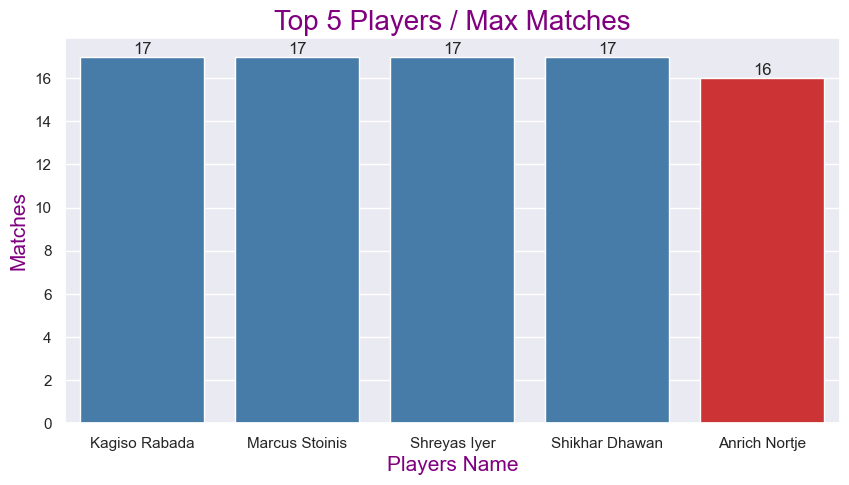

In [8]:
top_5 = df.groupby(['Player','Mat'],as_index = False)['Mat'].max().sort_values(by = 'Mat', ascending = False).head()
sns.set(rc = {'figure.figsize':(10,5)})
x = sns.barplot(data = top_5, x = 'Player', y = 'Mat', hue = 'Mat', palette = 'Set1',legend = False)
for i in x.containers:
    x.bar_label(i)
plt.title("Top 5 Players / Max Matches", color = 'purple', size = 20)
plt.xlabel("Players Name",color = 'purple', size = 15)
plt.ylabel("Matches", color = 'purple', size = 15)
plt.show()

# According to above chart "Kagiso Rabada","Marcus Stoinis","Shreyas Iyer" and "Shikhar Dhawan" all are played 17 matches.

# Q2. What is the top 5 highest average of a player in a season?

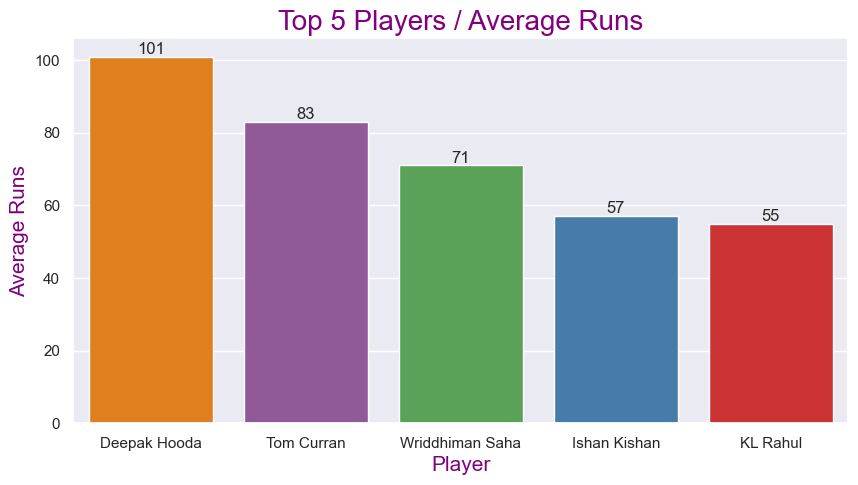

In [9]:
top_5A = df.groupby(['Player','Avg'],as_index = False)['Avg'].max().sort_values(by = 'Avg', ascending = False).head()
x = sns.barplot(data = top_5A, x = 'Player', y = 'Avg', hue = 'Avg', palette = 'Set1',legend = False)
for i in x.containers:
    x.bar_label(i)
plt.title("Top 5 Players / Average Runs",color = 'purple', size = 20)
plt.xlabel("Player",color = 'purple', size = 15)
plt.ylabel("Average Runs",color = 'purple', size = 15)
plt.show()

# In above chart we can say that "Deepak Hooda" makes Average Runs.

# Q3. Please check the correlation between all the features.

In [10]:
df1 = df.drop("Player",axis = 1)

In [11]:
df1['HS'] = df1['HS'].str.replace("*", "")

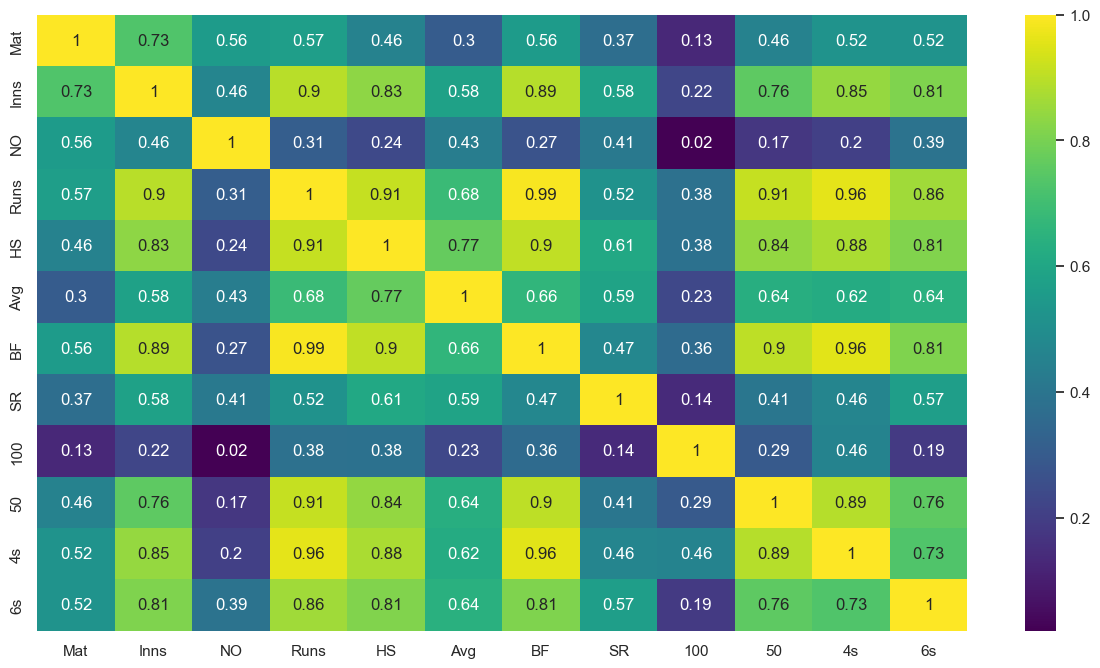

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1.corr(), annot = True , cmap = 'viridis')
plt.show()

# Q4. Check the list of players who has an average greater than 50 as well strike rate above 120.

In [13]:
df[(df['Avg']> 50) & (df['SR'] > 120)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30
32,Kieron Pollard,16,12,7,268,60*,53,140,191,0,1,15,22
37,Wriddhiman Saha,4,4,1,214,87,71,153,139,0,2,24,5
58,Deepak Hooda,7,5,4,101,62*,101,71,142,0,1,5,5
61,Tom Curran,5,4,3,83,54*,83,62,133,0,1,5,3


# Q5. Please check the list of players who has an average greater than 40 and balls faced above 100.

In [14]:
df[(df['Avg'] > 40) & (df['BF'] > 100)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44,427,144,2,4,67,12
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30
9,Virat Kohli,15,15,4,466,90*,42,384,121,0,3,23,11
10,AB de Villiers,15,14,4,454,73*,45,286,158,0,5,33,23
15,Eoin Morgan,14,14,4,418,68*,41,302,138,0,1,32,24
25,Kane Williamson,12,11,4,317,67,45,237,133,0,3,26,10
28,Chris Gayle,7,7,0,288,99,41,210,137,0,3,15,23
32,Kieron Pollard,16,12,7,268,60*,53,140,191,0,1,15,22


# Q6. Please check the list of players who scored more than 300 runs with an average greater than 45 & strike rate above 130.

In [15]:
df[(df['Runs'] > 300) & (df['Avg'] > 45) & (df['SR'] > 130)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30


# Q7. Players who scroed alteast one century in this season.

In [16]:
df[df['100'] >= 1]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44,427,144,2,4,67,12
14,Mayank Agarwal,11,11,0,424,106,38,271,156,1,2,44,15
29,Ben Stokes,8,8,1,285,107*,40,200,142,1,1,36,7


# Q8. Players who scored atleast 4 half centuries in this season.

In [17]:
df[df['50'] >= 4]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44,427,144,2,4,67,12
3,David Warner,16,16,2,548,85*,39,407,134,0,4,52,14
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30
6,Quinton de Kock,16,16,2,503,78*,35,358,140,0,4,46,22
7,Suryakumar Yadav,16,15,3,480,79*,40,331,145,0,4,61,11
8,Devdutt Padikkal,15,15,0,473,74,31,379,124,0,5,51,8
10,AB de Villiers,15,14,4,454,73*,45,286,158,0,5,33,23
11,Faf du Plessis,13,13,2,449,87*,40,319,140,0,4,42,14


# Q9. Check the list of players who hit more than 45 boundARIES and more than 10 sixes in this season.

In [18]:
df[(df['4s'] > 45) & (df['6s'] > 10)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44,427,144,2,4,67,12
3,David Warner,16,16,2,548,85*,39,407,134,0,4,52,14
6,Quinton de Kock,16,16,2,503,78*,35,358,140,0,4,46,22
7,Suryakumar Yadav,16,15,3,480,79*,40,331,145,0,4,61,11


# Q10. Plot a histogram of number of matches played in a season by players.

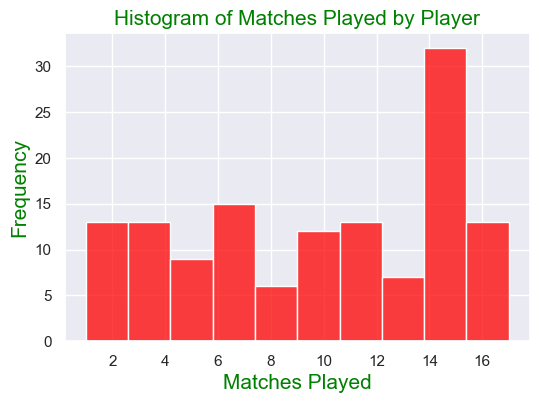

In [19]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.histplot(data = df, x = 'Mat',bins = 10, color = 'red')
plt.title("Histogram of Matches Played by Player", color = 'green', size = 15)
plt.xlabel("Matches Played", color = 'green', size = 15)
plt.ylabel("Frequency", color = 'green', size = 15)
plt.show()

# Q11. Plot the histogram of balls faced by players.

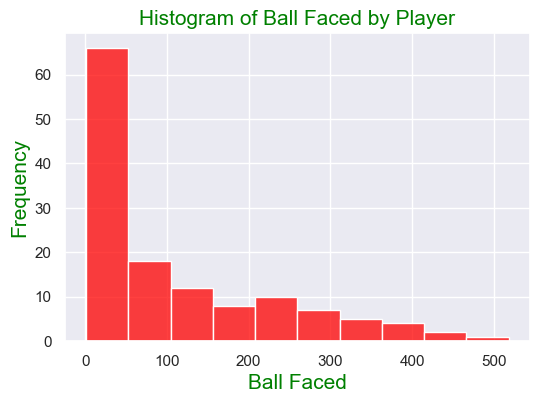

In [20]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.histplot(data = df, x = 'BF',bins = 10, color = 'red')
plt.title("Histogram of Ball Faced by Player", color = 'green', size = 15)
plt.xlabel("Ball Faced", color = 'green', size = 15)
plt.ylabel("Frequency", color = 'green', size = 15)
plt.show()

# Q12. Top 30 players with most runs.

In [21]:
df.sort_values(by = 'Runs', ascending = False).head(30)

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
2,Shikhar Dhawan,17,17,3,618,106*,44,427,144,2,4,67,12
3,David Warner,16,16,2,548,85*,39,407,134,0,4,52,14
4,Shreyas Iyer,17,17,2,519,88*,34,421,123,0,3,40,16
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30
6,Quinton de Kock,16,16,2,503,78*,35,358,140,0,4,46,22
7,Suryakumar Yadav,16,15,3,480,79*,40,331,145,0,4,61,11
8,Devdutt Padikkal,15,15,0,473,74,31,379,124,0,5,51,8
9,Virat Kohli,15,15,4,466,90*,42,384,121,0,3,23,11


# Q13. Bar chart for top 20 players with best strike rate in a season.

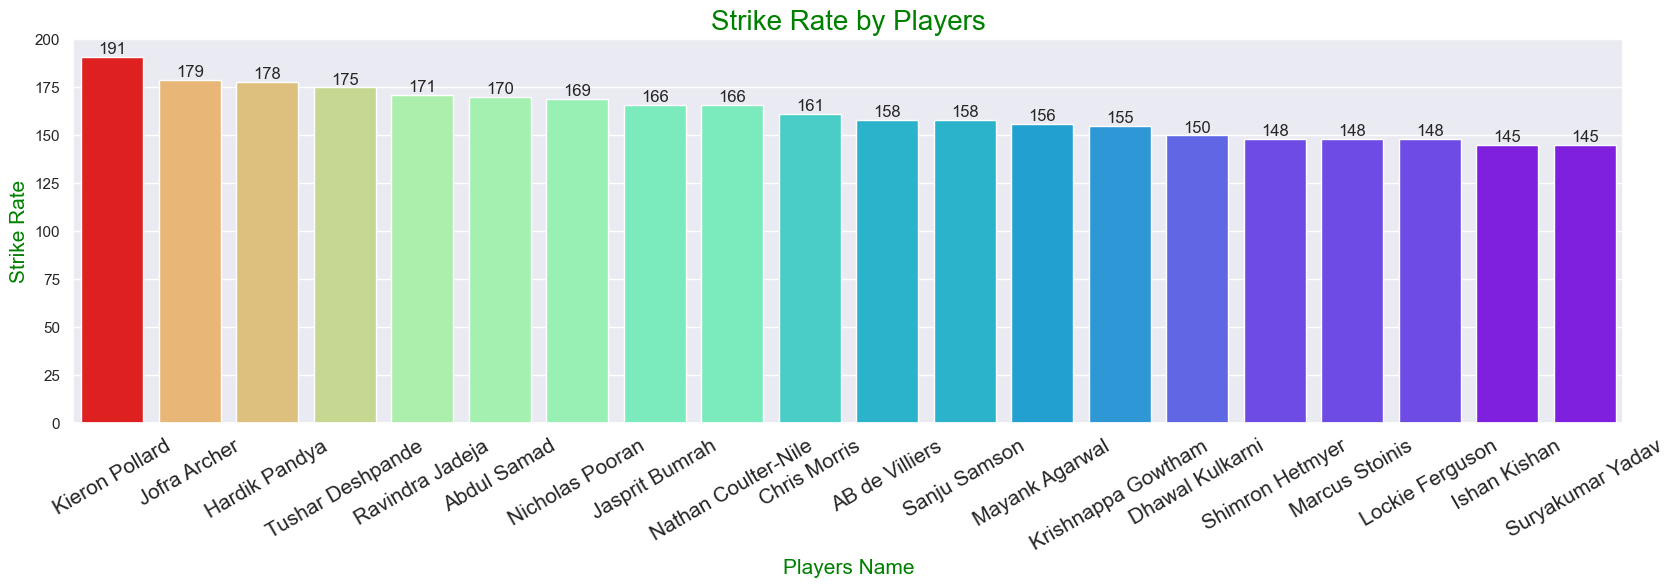

In [22]:
top_20 = df.groupby(['Player'], as_index = False)['SR'].max().sort_values(by = 'SR', ascending = False).head(20)
sns.set(rc = {'figure.figsize':(20,5)})
x = sns.barplot(data = top_20, x = 'Player', y = 'SR', hue = 'SR', palette = 'rainbow', legend = False)
for i in x.containers:
    x.bar_label(i)
plt.title("Strike Rate by Players",color = "green", size = 20)
plt.xlabel("Players Name", color = "green", size = 15)
plt.ylabel("Strike Rate", color = "green", size = 15)
plt.xticks(rotation = 30,size = 15)
plt.show()

# Q14. Top 30 players with highest number of sixes.

In [23]:
df.sort_values(by = '6s', ascending = False).head(30)

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
POS,,,,,,,,,,,,,
5,Ishan Kishan,14,13,4,516,99,57,354,145,0,4,36,30
16,Sanju Samson,14,14,1,375,85,28,236,158,0,3,21,26
30,Hardik Pandya,14,13,5,281,60*,35,157,178,0,1,14,25
18,Nicholas Pooran,14,14,4,353,77,35,208,169,0,2,23,25
15,Eoin Morgan,14,14,4,418,68*,41,302,138,0,1,32,24
10,AB de Villiers,15,14,4,454,73*,45,286,158,0,5,33,23
28,Chris Gayle,7,7,0,288,99,41,210,137,0,3,15,23
1,KL Rahul,14,14,2,670,132*,55,518,129,1,5,58,23
32,Kieron Pollard,16,12,7,268,60*,53,140,191,0,1,15,22


# Q15. Scatter plot of runs scored by a player v/s balls faced in a season.

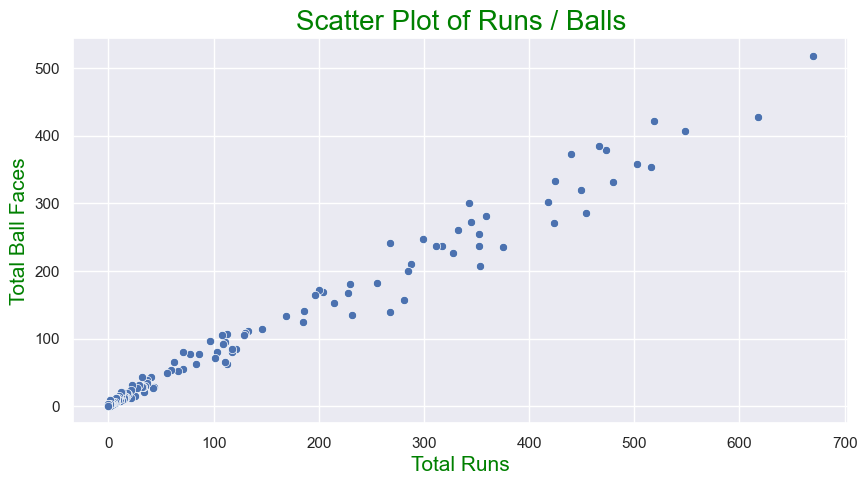

In [24]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(data = df, x = 'Runs', y = 'BF')
plt.title("Scatter Plot of Runs / Balls", color = "green", size = 20)
plt.xlabel("Total Runs", color = "green", size = 15)
plt.ylabel("Total Ball Faces", color = "green", size = 15)
plt.show()

# Q16. KDE plot for averages on a season.

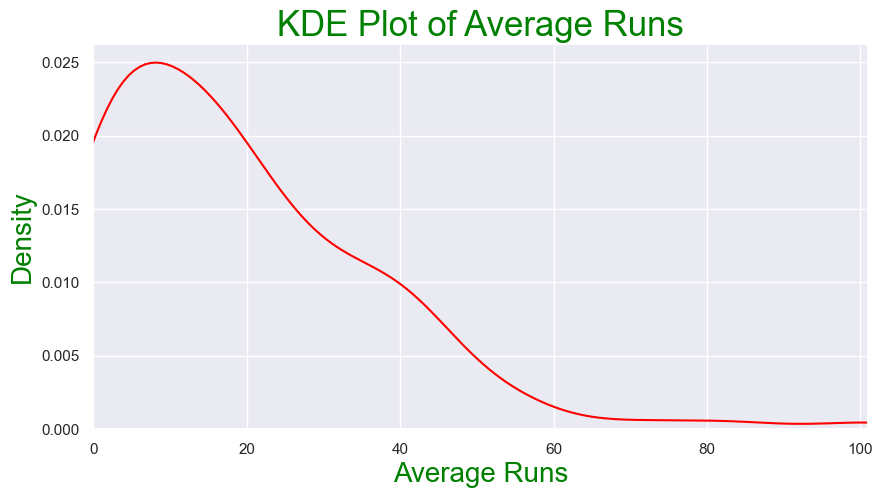

In [25]:
sns.kdeplot(data = df, x = 'Avg', color = 'red')
plt.xlim(0 , 101)
plt.title('KDE Plot of Average Runs', color = 'Green', size = 25)
plt.xlabel('Average Runs',color = 'Green', size = 20)
plt.ylabel('Density', color = 'Green', size = 20)
plt.show()